In [20]:
import pandas as pd

# Load the CSV data into a pandas DataFrame
data = pd.read_csv('sample_submission.csv')

# Display the first few rows of the DataFrame
data.head()


,id,num_sold
0,136950,100
1,136951,100
2,136952,100
3,136953,100
4,136954,100


In [21]:
# Load the CSV data into a pandas DataFrame
test_data = pd.read_csv('test.csv')

# Display the first few rows of the DataFrame
test_data.head()


,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


In [22]:
# Load the CSV data into a pandas DataFrame
train_data = pd.read_csv('train.csv')

# Display the first few rows of the DataFrame
train_data.head()


,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


C:\Users\sajid\AppData\Local\Temp\ipykernel_5012\3029854067.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


(id          0
 date        0
 country     0
 store       0
 product     0
 num_sold    0
 dtype: int64,
                  id       num_sold
 count  136950.00000  136950.000000
 mean    68474.50000     165.522636
 std     39534.20402     183.691575
 min         0.00000       2.000000
 25%     34237.25000      46.000000
 50%     68474.50000      98.000000
 75%    102711.75000     184.000000
 max    136949.00000    1380.000000,
           country         store                            product
 count      136950        136950                             136950
 unique          5             3                                  5
 top     Argentina  Kaggle Learn  Using LLMs to Improve Your Coding
 freq        27390         45650                              27390,
                 id  num_sold
 id        1.000000  0.008029
 num_sold  0.008029  1.000000)

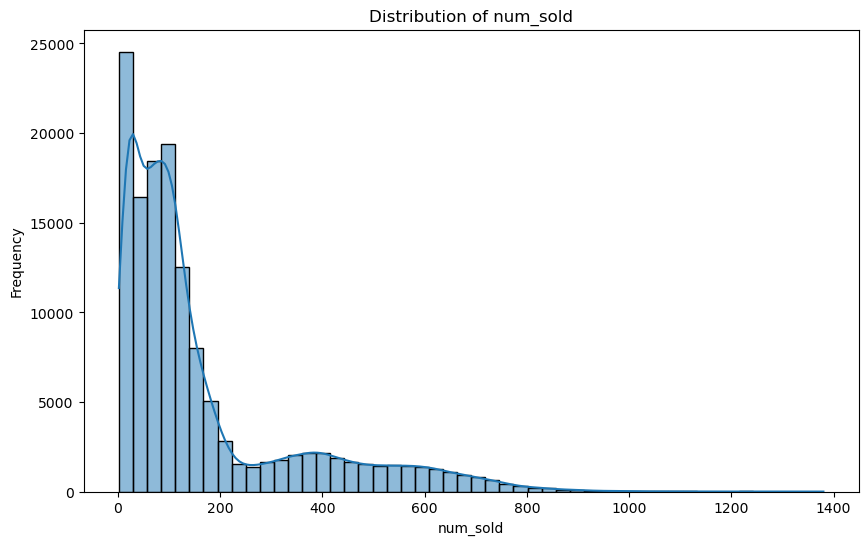

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = train_data.isnull().sum()

# Display statistics for numerical columns
numerical_stats = train_data.describe()

# Display statistics for categorical columns
categorical_stats = train_data.describe(include=['O'])

# Correlation matrix for numerical columns
corr_matrix = train_data.corr()

# Plotting the distribution of 'num_sold'
plt.figure(figsize=(10, 6))
sns.histplot(train_data['num_sold'], bins=50, kde=True)
plt.title('Distribution of num_sold')
plt.xlabel('num_sold')
plt.ylabel('Frequency')

missing_values, numerical_stats, categorical_stats, corr_matrix


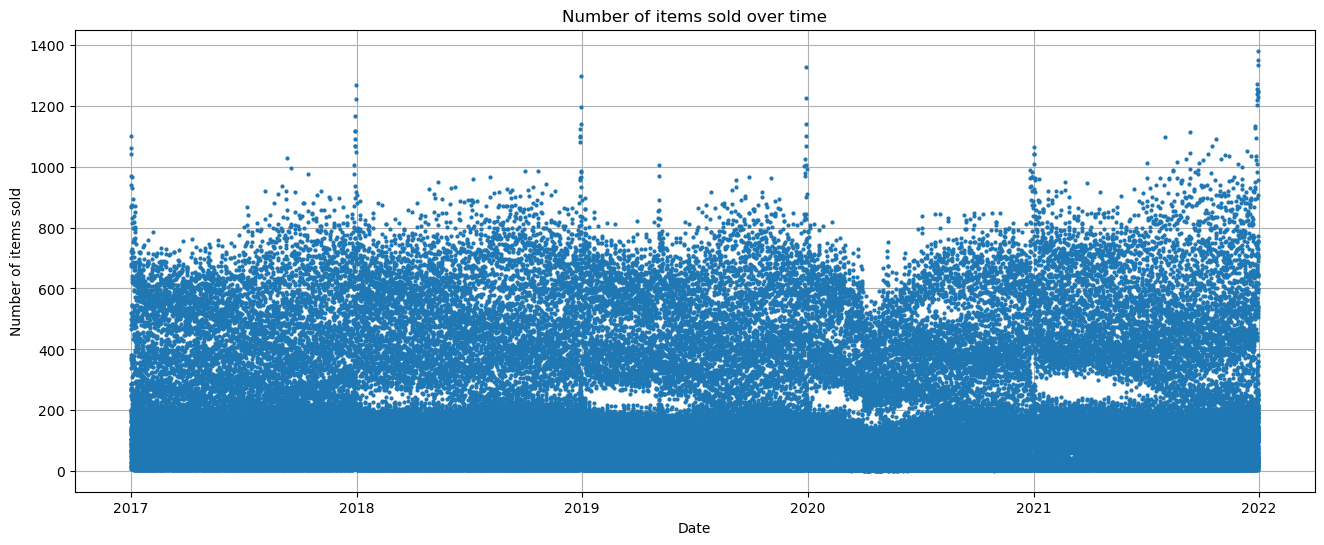

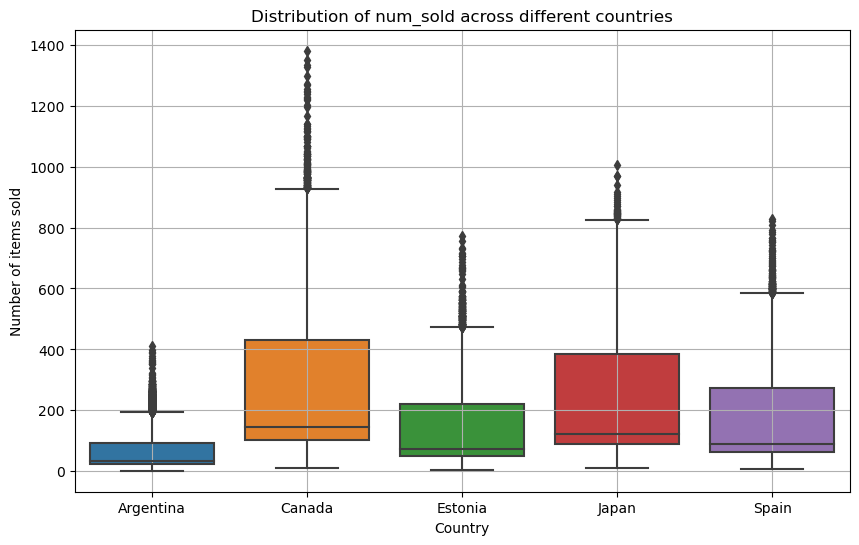

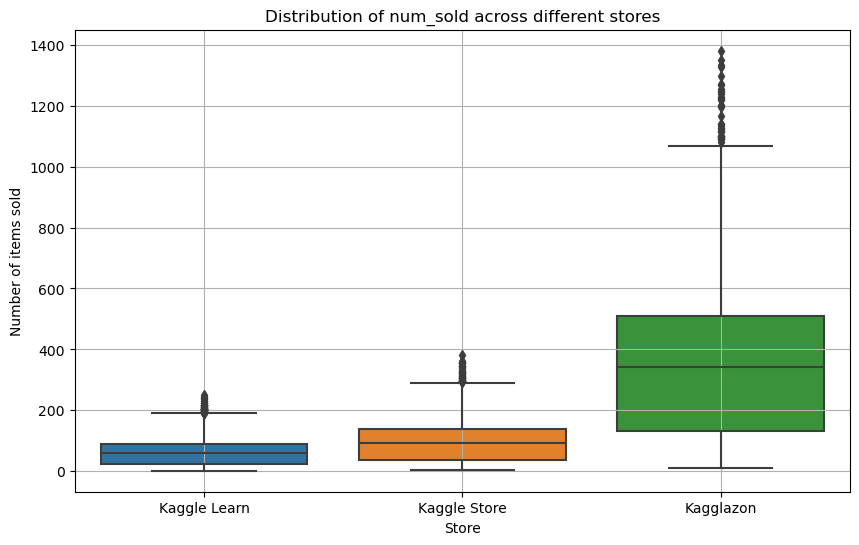

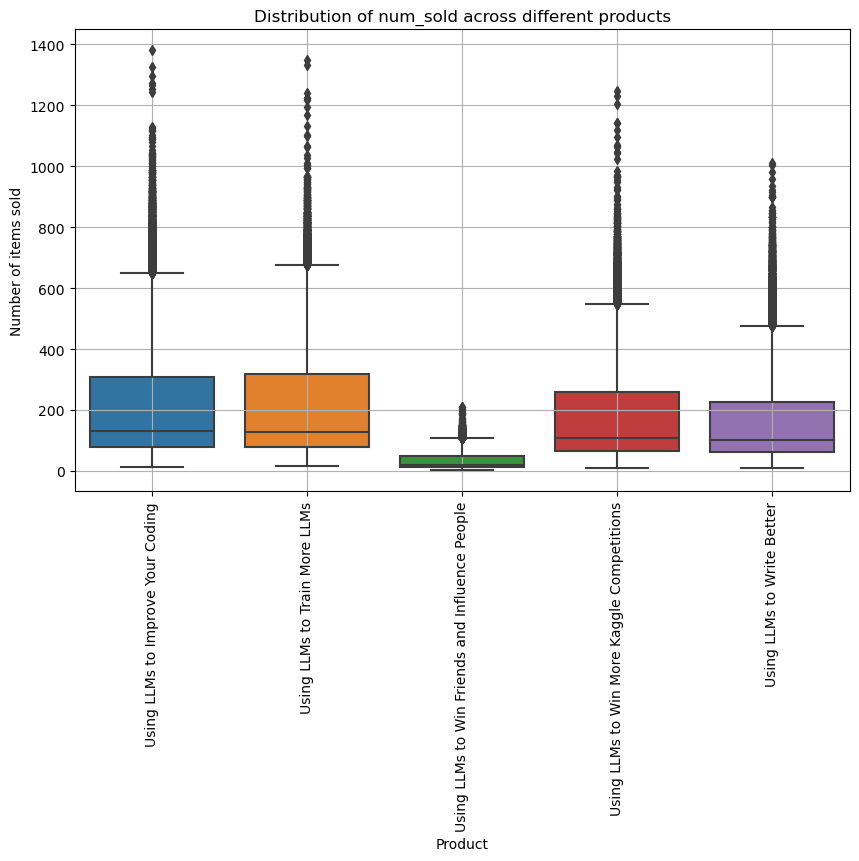

In [24]:
# Convert 'date' column to datetime type
train_data['date'] = pd.to_datetime(train_data['date'])

# Plotting 'num_sold' over time
plt.figure(figsize=(16, 6))
plt.plot_date(train_data['date'], train_data['num_sold'], markersize=2)
plt.title('Number of items sold over time')
plt.xlabel('Date')
plt.ylabel('Number of items sold')
plt.grid(True)
plt.show()

# Plotting 'num_sold' across different countries
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='num_sold', data=train_data)
plt.title('Distribution of num_sold across different countries')
plt.xlabel('Country')
plt.ylabel('Number of items sold')
plt.grid(True)
plt.show()

# Plotting 'num_sold' across different stores
plt.figure(figsize=(10, 6))
sns.boxplot(x='store', y='num_sold', data=train_data)
plt.title('Distribution of num_sold across different stores')
plt.xlabel('Store')
plt.ylabel('Number of items sold')
plt.grid(True)
plt.show()

# Plotting 'num_sold' across different products
plt.figure(figsize=(10, 6))
sns.boxplot(x='product', y='num_sold', data=train_data)
plt.xticks(rotation=90)
plt.title('Distribution of num_sold across different products')
plt.xlabel('Product')
plt.ylabel('Number of items sold')
plt.grid(True)
plt.show()


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
model = GradientBoostingRegressor(random_state=0)

# Fit the model
X_train = train_data_encoded
y_train = train_data['num_sold']
model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=0)

In [19]:
# Use the trained model to make predictions on the test data
test_predictions = model.predict(test_data_encoded)

# Add the predictions to the test DataFrame
test_data['num_sold'] = test_predictions

# Display the first few rows of the test DataFrame
test_data.head()


,id,date,country,store,product,month,day_of_week,num_sold
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,1,5,36.819622
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,1,5,32.933644
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,1,5,7.101654
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,1,5,30.262194
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,1,5,27.808156


In [29]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Aggregate sales by date
total_sales_by_date = train_data.groupby('date')['num_sold'].sum().reset_index()

# Scale the 'num_sold' column to the range [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(total_sales_by_date['num_sold'].values.reshape(-1,1))

# Define sequence length and split ratio for train and test sets
sequence_length = 30
split_ratio = 0.8  # use 80% of the data for training

# Calculate the index where to split the data
split_index = int(split_ratio * len(scaled_sales))

# Split the scaled sales data into a training set and a test set
train_sales = scaled_sales[:split_index]
test_sales = scaled_sales[split_index:]

# Create TimeseriesGenerator objects for training and testing
train_generator = TimeseriesGenerator(train_sales, train_sales, length=sequence_length, batch_size=1)
test_generator = TimeseriesGenerator(test_sales, test_sales, length=sequence_length, batch_size=1)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_generator, epochs=10, verbose=1)


Epoch 1/10
1430/1430 [==============================] - 11s 6ms/step - loss: 0.0085
Epoch 2/10
1430/1430 [==============================] - 10s 7ms/step - loss: 0.0067
Epoch 3/10
1430/1430 [==============================] - 9s 6ms/step - loss: 0.0063
Epoch 4/10
1430/1430 [==============================] - 9s 7ms/step - loss: 0.0062
Epoch 5/10
1430/1430 [==============================] - 9s 7ms/step - loss: 0.0050
Epoch 6/10
1430/1430 [==============================] - 10s 7ms/step - loss: 0.0039
Epoch 7/10
1430/1430 [==============================] - 10s 7ms/step - loss: 0.0036
Epoch 8/10
1430/1430 [==============================] - 9s 7ms/step - loss: 0.0026
Epoch 9/10
1430/1430 [==============================] - 10s 7ms/step - loss: 0.0015
Epoch 10/10
1430/1430 [==============================] - 10s 7ms/step - loss: 0.0016


In [30]:
# Make predictions on the test data
test_predictions = model.predict(test_generator)

# Rescale the predictions back to the original scale
test_predictions_rescaled = scaler.inverse_transform(test_predictions)

# Print the rescaled predictions
print(test_predictions_rescaled)


336/336 [==============================] - 1s 2ms/step
[[14418.595 ]
 [15065.09  ]
 [14586.539 ]
 [12601.855 ]
 [12855.118 ]
 [13131.089 ]
 [13494.321 ]
 [14128.927 ]
 [14683.595 ]
 [14256.643 ]
 [12522.42  ]
 [12603.551 ]
 [13168.719 ]
 [13517.816 ]
 [14369.503 ]
 [15101.244 ]
 [14346.551 ]
 [12691.72  ]
 [12951.818 ]
 [13379.908 ]
 [13447.419 ]
 [14545.136 ]
 [15026.715 ]
 [14515.42  ]
 [12399.275 ]
 [12630.368 ]
 [13222.137 ]
 [13508.546 ]
 [14604.457 ]
 [15485.228 ]
 [14457.93  ]
 [12944.102 ]
 [13124.779 ]
 [13418.038 ]
 [13779.638 ]
 [14164.965 ]
 [14936.748 ]
 [14374.658 ]
 [12491.323 ]
 [12688.743 ]
 [13126.129 ]
 [13597.232 ]
 [14442.279 ]
 [15304.787 ]
 [13913.464 ]
 [12361.353 ]
 [12603.235 ]
 [13129.208 ]
 [13549.471 ]
 [14288.404 ]
 [14960.86  ]
 [14195.228 ]
 [12591.8955]
 [12912.388 ]
 [13311.088 ]
 [13818.0625]
 [14748.984 ]
 [15145.415 ]
 [14606.8545]
 [12689.16  ]
 [12809.735 ]
 [13050.647 ]
 [13249.057 ]
 [14174.444 ]
 [15027.802 ]
 [14004.213 ]
 [12401.622 ]
 [13220